In [1]:
import sklearn.svm
import sklearn.linear_model
import numpy as np
from matplotlib import pyplot as plt

import split

%matplotlib inline

In [2]:
train_ids, val_ids, test_ids, train_labels, val_labels, test_labels = split.two_balanced_classes()

## SVM

In [3]:
color = True

In [4]:
l_list = [5, 6, 8, 10, 13, 16]
errors = np.zeros(len(l_list))
for i, l in enumerate(l_list):
    train_data, val_data, test_data = split.load_images(train_ids, val_ids, test_ids, l, color)
    model = sklearn.svm.LinearSVC(penalty='l2', C=1e10, dual=False)
    model.fit(train_data, train_labels)
    predictions = model.predict(val_data)
    err = (predictions != val_labels).sum() / len(val_labels)
    
    errors[i] = err

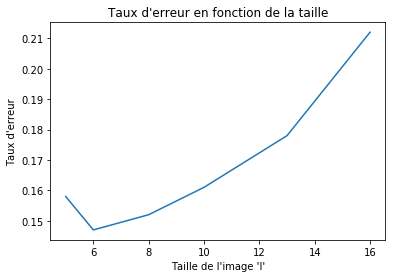

In [5]:
plt.plot(l_list, errors)
plt.title("Taux d'erreur en fonction de la taille")
plt.xlabel("Taille de l'image 'l'")
plt.ylabel("Taux d'erreur")

In [8]:
i_opt = np.argmin(errors)
l_opt = l_list[i_opt]
train_data, val_data, test_data = split.load_images(train_ids, val_ids, test_ids, l_opt, color)
model = sklearn.svm.LinearSVC(penalty='l2', C=1e10, dual=False)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
err = (predictions != test_labels).sum() / len(test_labels)
l_opt, err

(6, 0.16700000000000001)

## Logistic regression

In [10]:
color = False

In [11]:
l_list = [5, 6, 8, 10, 13, 16]
errors = np.zeros(len(l_list))
for i, l in enumerate(l_list):
    train_data, val_data, test_data = split.load_images(train_ids, val_ids, test_ids, l, color)
    model = sklearn.linear_model.LogisticRegression(penalty='l2', C=1e10)
    model.fit(train_data, train_labels)
    predictions = model.predict(val_data)
    err = (predictions != val_labels).sum() / len(val_labels)
    
    errors[i] = err

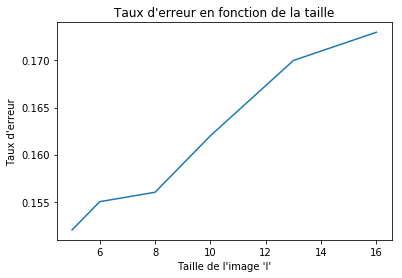

In [12]:
plt.plot(l_list, errors)
plt.title("Taux d'erreur en fonction de la taille")
plt.xlabel("Taille de l'image 'l'")
plt.ylabel("Taux d'erreur")

In [13]:
i_opt = np.argmin(errors)
l_opt = l_list[i_opt]
train_data, val_data, test_data = split.load_images(train_ids, val_ids, test_ids, l_opt, color)
model = sklearn.linear_model.LogisticRegression(penalty='l2', C=1e10)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
err = (predictions != test_labels).sum() / len(test_labels)
l_opt, err

(5, 0.16300000000000001)